# Small EDA

In [44]:
import pandas as pd

df_activity = pd.read_csv("activity_clean.csv")
df_training = pd.read_csv("training_clean.csv")
df_247      = pd.read_csv("df_247_clean.csv")


## Aktivität

In [45]:
# print(df_activity.columns)
# print(df_activity.head())

In [46]:
print(df_activity.columns)
print(df_activity.head(),"\n")

Index(['date', 'startTime', 'endTime', 'stepCount', 'stepsDistance',
       'calories', 'sleepQuality', 'sleepDuration', 'inactivityAlertCount',
       'dailyMetMinutes', 'CONTINUOS_MODERATE', 'CONTINUOS_VIGOROUS',
       'INTERMITTENT_MODERATE', 'INTERMITTENT_VIGOROUS', 'LIGHT', 'NON_WEAR',
       'NO_DATA', 'SEDENTARY', 'SLEEP', 'vo2Max', 'maximumHeartRate',
       'sleepGoal'],
      dtype='object')
         date startTime   endTime  stepCount  stepsDistance  calories  \
0  2024-01-26  00:00:00  23:59:59    14080.0    9755.738281    2547.0   
1  2015-11-27       NaN       NaN        NaN            NaN       NaN   
2  2025-06-21  00:00:00  23:59:59    25568.0   21580.402344    3181.0   
3  2021-09-16  00:00:00  23:59:59    11060.0    6132.661621    2651.0   
4  2024-07-15  00:00:00  23:59:59    27691.0   21221.250000    3294.0   

   sleepQuality sleepDuration  inactivityAlertCount  dailyMetMinutes  ...  \
0      0.872167      09:11:30                   0.0           367.00  ...   
1

## Training

In [47]:
print(df_training.columns)
print(df_training.head())
df_training['date'].value_counts()
df_training['distance'].max()


Index(['date', 'name', 'startTime', 'stopTime', 'timeZoneOffset', 'distance',
       'duration', 'kiloCalories', 'maximumHeartRate', 'averageHeartRate',
       'duration_minutes', 'vo2Max', 'restingHeartRate', 'anaerobicThreshold',
       'functionalThresholdPower', 'sleepGoal', 'sport', 'minHeartRate'],
      dtype='object')
         date    name startTime  stopTime  timeZoneOffset      distance  \
0  2017-07-23  Laufen  14:53:26  15:58:59             120  10503.000000   
1  2024-02-12     NaN  20:14:26  20:44:02              60           NaN   
2  2023-03-19     NaN  17:40:45  19:12:37              60           NaN   
3  2023-04-29     NaN  08:14:07  11:13:54             120  72330.203125   
4  2023-05-22     NaN  17:46:14  18:07:53             120    770.400024   

   duration  kiloCalories  maximumHeartRate  averageHeartRate  \
0  01:05:33         587.0               198               NaN   
1  00:29:36         206.0               197             128.0   
2  01:31:52         732.0 

112900.0

## 24/7

In [48]:
print(df_247.columns)
print(df_247.head())


Index(['date', 'time', 'heartRate', 'source'], dtype='object')
         date      time  heartRate  source
0  2021-10-07  16:32:56         89  MANUAL
1  2021-10-07  16:32:57         90  MANUAL
2  2021-10-07  16:32:58         91  MANUAL
3  2021-10-07  16:32:59         92  MANUAL
4  2021-10-07  16:33:00         92  MANUAL


In [49]:
print(df_training['maximumHeartRate'].min())
print(df_247['heartRate'].max())

194
187


In [ ]:
(df_247["heartRate"] == 0).sum()
(df_247["heartRate"] == 0).mean() * 100

# Neue Spalte zur Kennzeichnung
df_247["status"] = df_247["heartRate"].apply(
    lambda x: "nicht getragen" if x == 0 else "getragen"
)

In [62]:
# neuen DataFrame erzeugen, ohne "nicht getragen"-Zeilen
df_247 = df_247[df_247["heartRate"] != 0].copy().reset_index(drop=True)

In [63]:
df_247.head()

,date,time,heartRate,source,status,datetime,year,month,hour,weekday
0,2020-01-01,10:05:23,65,TIMED_24_7,getragen,2020-01-01 10:05:23,2020,1,10,Wednesday
1,2020-01-01,10:59:48,68,MANUAL,getragen,2020-01-01 10:59:48,2020,1,10,Wednesday
2,2020-01-01,10:59:49,68,MANUAL,getragen,2020-01-01 10:59:49,2020,1,10,Wednesday
3,2020-01-01,10:59:50,67,MANUAL,getragen,2020-01-01 10:59:50,2020,1,10,Wednesday
4,2020-01-01,10:59:51,67,MANUAL,getragen,2020-01-01 10:59:51,2020,1,10,Wednesday


## Beschreibende Fragen

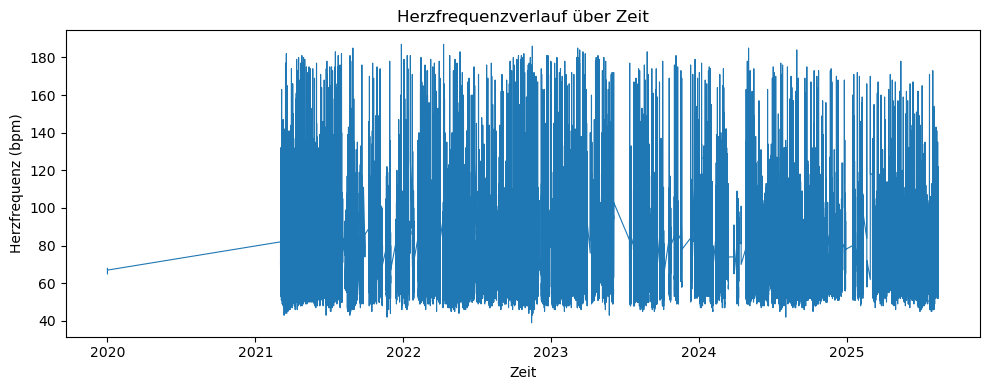

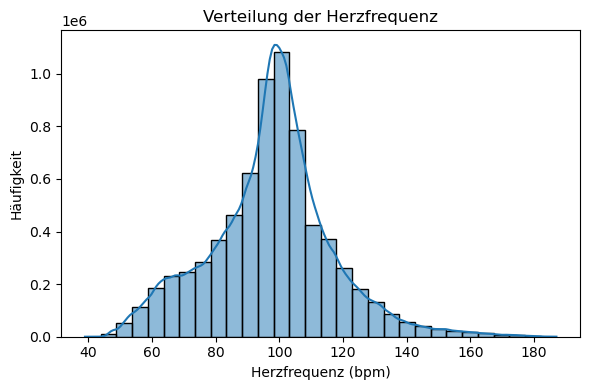

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datums- und Zeitformate zusammenführen
df_247["datetime"] = pd.to_datetime(df_247["date"].astype(str) + " " + df_247["time"])
df_247 = df_247.sort_values("datetime")

# Tagesweise Herzfrequenzstatistik
daily_stats = (
    df_247.groupby("date")["heartRate"]
    .agg(["min", "mean", "max", "std"])
    .rename(columns={"min": "Min", "mean": "Durchschnitt", "max": "Max", "std": "StdAbw"})
)

# --- Visualisierungen ---

plt.figure(figsize=(10,4))
sns.lineplot(x="datetime", y="heartRate", data=df_247, linewidth=0.8)
plt.title("Herzfrequenzverlauf über Zeit")
plt.xlabel("Zeit")
plt.ylabel("Herzfrequenz (bpm)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df_247["heartRate"], bins=30, kde=True)
plt.title("Verteilung der Herzfrequenz")
plt.xlabel("Herzfrequenz (bpm)")
plt.ylabel("Häufigkeit")
plt.tight_layout()
plt.show()

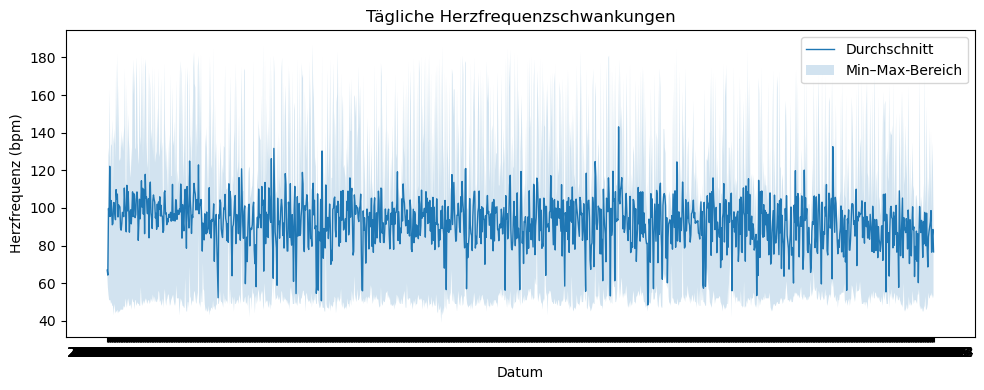

In [65]:
daily_stats = (
    df_247.groupby("date")["heartRate"]
    .agg(["min", "mean", "max", "std"])
    .rename(columns={"min": "Min", "mean": "Durchschnitt", "max": "Max", "std": "StdAbw"})
)

plt.figure(figsize=(10,4))
plt.plot(daily_stats.index, daily_stats["Durchschnitt"], label="Durchschnitt", linewidth=1)
plt.fill_between(daily_stats.index, daily_stats["Min"], daily_stats["Max"], alpha=0.2, label="Min–Max-Bereich")
plt.title("Tägliche Herzfrequenzschwankungen")
plt.xlabel("Datum")
plt.ylabel("Herzfrequenz (bpm)")
plt.legend()
plt.tight_layout()
plt.show()

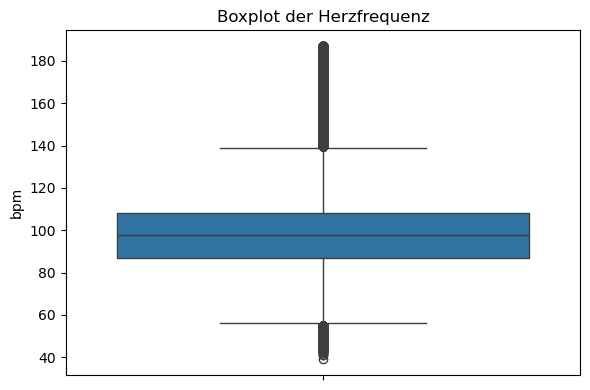

In [66]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df_247["heartRate"])
plt.title("Boxplot der Herzfrequenz")
plt.ylabel("bpm")
plt.tight_layout()
plt.show()

## Zeitlich aggregierte Fragen

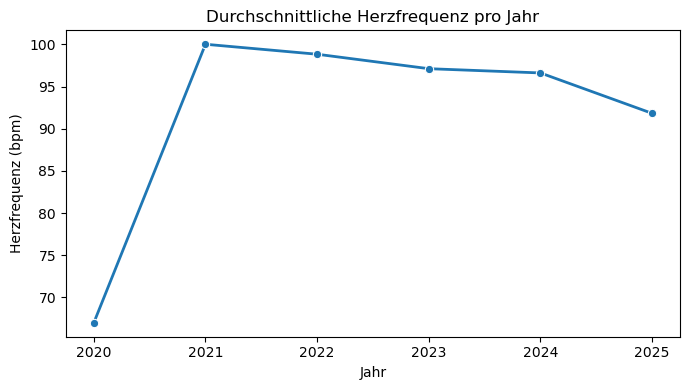

In [67]:
df_247["year"] = pd.to_datetime(df_247["date"]).dt.year
yearly_avg = df_247.groupby("year")["heartRate"].mean().reset_index()

plt.figure(figsize=(7,4))
sns.lineplot(x="year", y="heartRate", data=yearly_avg, marker="o", linewidth=2)
plt.title("Durchschnittliche Herzfrequenz pro Jahr")
plt.xlabel("Jahr")
plt.ylabel("Herzfrequenz (bpm)")
plt.tight_layout()
plt.show()

/var/folders/39/kcdnbq2n0td1_y5_f_6z5glc0000gn/T/ipykernel_874/3871385806.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="month", y="heartRate", data=monthly_avg, palette="coolwarm")


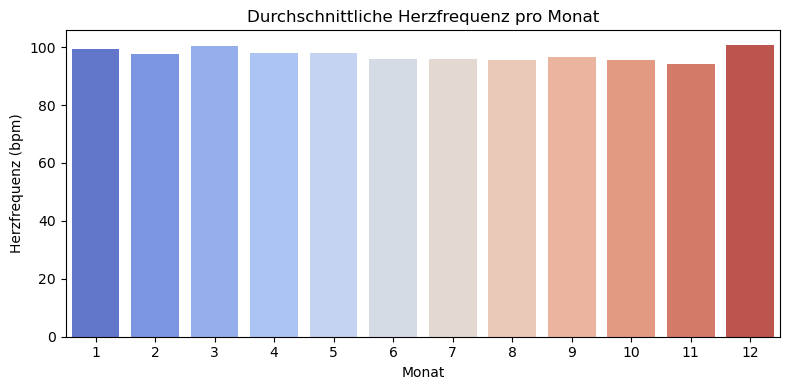

In [68]:
df_247["month"] = pd.to_datetime(df_247["date"]).dt.month
monthly_avg = df_247.groupby("month")["heartRate"].mean().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x="month", y="heartRate", data=monthly_avg, palette="coolwarm")
plt.title("Durchschnittliche Herzfrequenz pro Monat")
plt.xlabel("Monat")
plt.ylabel("Herzfrequenz (bpm)")
plt.tight_layout()
plt.show()

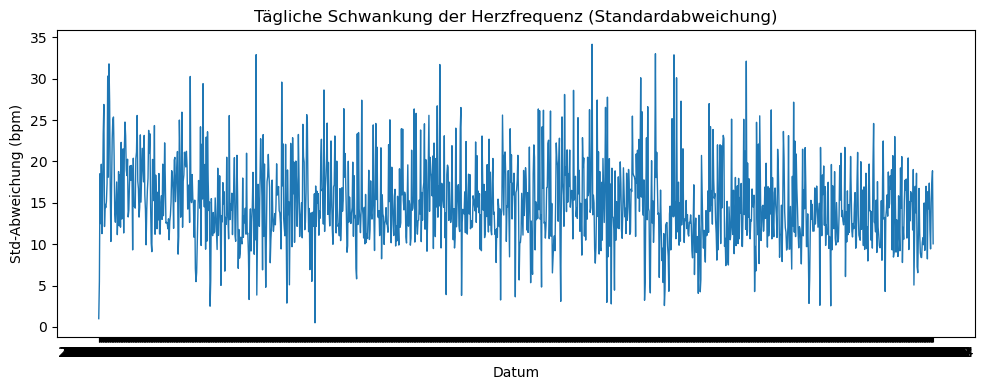

In [69]:
daily_var = df_247.groupby("date")["heartRate"].std().reset_index(name="std")

plt.figure(figsize=(10,4))
sns.lineplot(x="date", y="std", data=daily_var, linewidth=1)
plt.title("Tägliche Schwankung der Herzfrequenz (Standardabweichung)")
plt.xlabel("Datum")
plt.ylabel("Std-Abweichung (bpm)")
plt.tight_layout()
plt.show()

## Interpretativ / explorativ

/var/folders/39/kcdnbq2n0td1_y5_f_6z5glc0000gn/T/ipykernel_874/1064151041.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_247["hour"] = pd.to_datetime(df_247["time"]).dt.hour


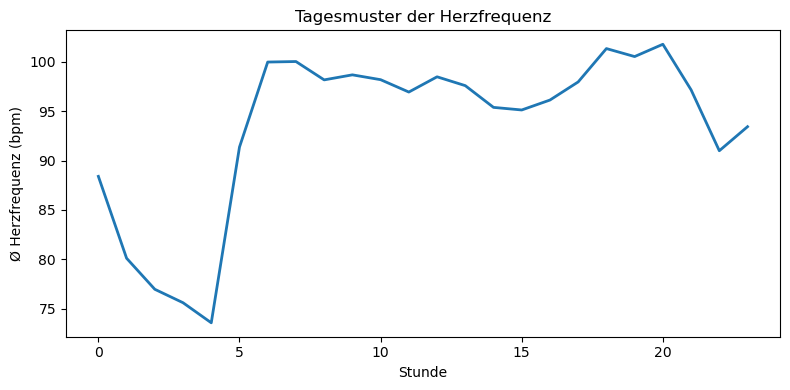

In [70]:
# Stundenmittel berechnen
df_247["hour"] = pd.to_datetime(df_247["time"]).dt.hour
hourly_avg = df_247.groupby("hour")["heartRate"].mean().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(x="hour", y="heartRate", data=hourly_avg, linewidth=2)
plt.title("Tagesmuster der Herzfrequenz")
plt.xlabel("Stunde")
plt.ylabel("Ø Herzfrequenz (bpm)")
plt.tight_layout()
plt.show()

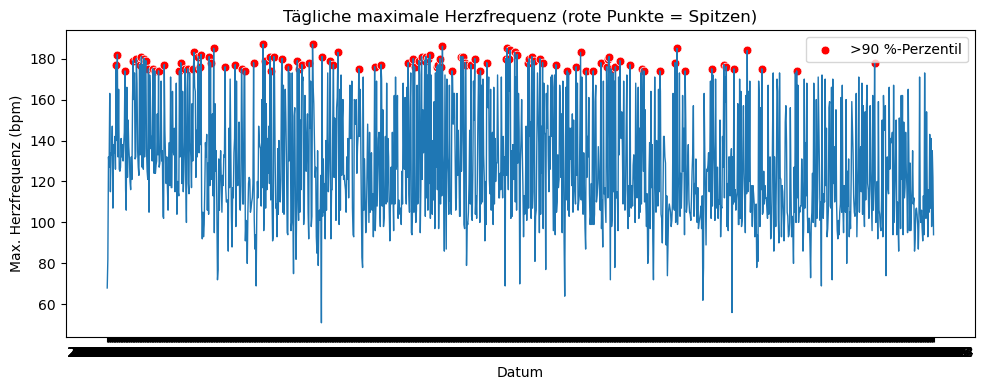

In [71]:
daily_max = (
    df_247.groupby("date")["heartRate"]
    .agg(["min","mean","max","std"])
    .reset_index()
)

# Tage mit auffällig hoher Max-HF markieren
threshold = daily_max["max"].quantile(0.9)
high_intensity_days = daily_max[daily_max["max"] > threshold]

plt.figure(figsize=(10,4))
sns.lineplot(x="date", y="max", data=daily_max, linewidth=1)
sns.scatterplot(x="date", y="max", data=high_intensity_days, color="red", s=40, label=">90 %-Perzentil")
plt.title("Tägliche maximale Herzfrequenz (rote Punkte = Spitzen)")
plt.xlabel("Datum")
plt.ylabel("Max. Herzfrequenz (bpm)")
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/39/kcdnbq2n0td1_y5_f_6z5glc0000gn/T/ipykernel_874/3553652538.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weekday", y="mean", data=weekday_stats, order=order, palette="viridis")


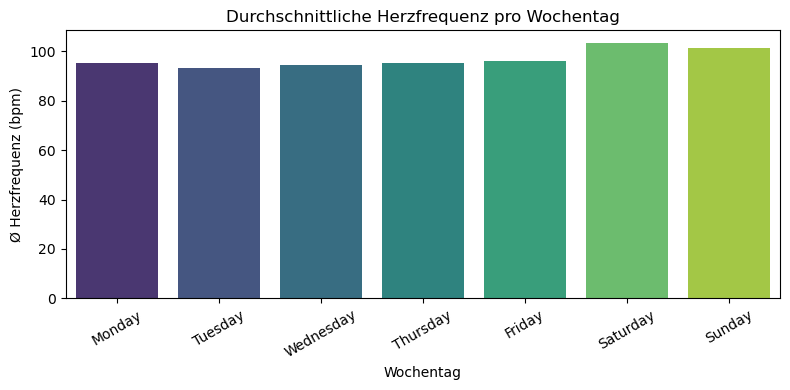

In [72]:
# Wochentag extrahieren (0 = Montag, 6 = Sonntag)
df_247["weekday"] = pd.to_datetime(df_247["date"]).dt.day_name()

# Durchschnittliche Herzfrequenz pro Wochentag
weekday_stats = (
    df_247.groupby("weekday")["heartRate"]
    .agg(["min", "mean", "max", "std"])
    .reset_index()
)

# Reihenfolge der Wochentage festlegen
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(8,4))
sns.barplot(x="weekday", y="mean", data=weekday_stats, order=order, palette="viridis")
plt.title("Durchschnittliche Herzfrequenz pro Wochentag")
plt.xlabel("Wochentag")
plt.ylabel("Ø Herzfrequenz (bpm)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

/var/folders/39/kcdnbq2n0td1_y5_f_6z5glc0000gn/T/ipykernel_874/769398751.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="date", y="change", data=daily_mean, palette="coolwarm")


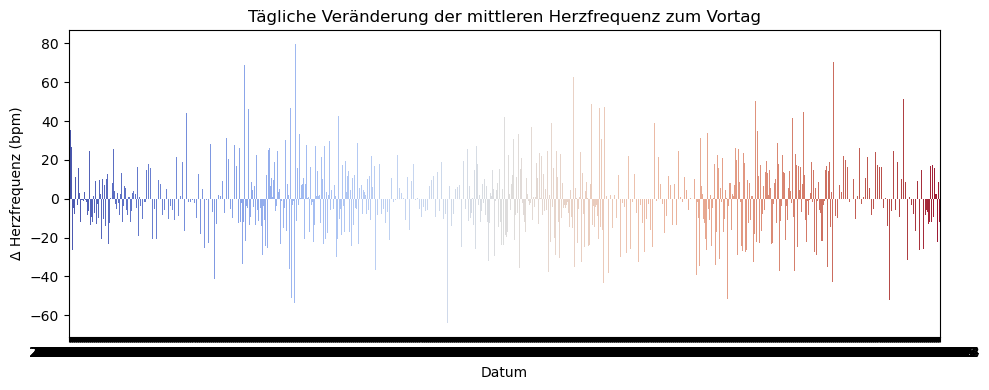

In [73]:
daily_mean = df_247.groupby("date")["heartRate"].mean().reset_index()
daily_mean["prev_day_mean"] = daily_mean["heartRate"].shift(1)
daily_mean["change"] = daily_mean["heartRate"] - daily_mean["prev_day_mean"]

plt.figure(figsize=(10,4))
sns.barplot(x="date", y="change", data=daily_mean, palette="coolwarm")
plt.title("Tägliche Veränderung der mittleren Herzfrequenz zum Vortag")
plt.xlabel("Datum")
plt.ylabel("Δ Herzfrequenz (bpm)")
plt.tight_layout()
plt.show()